In [1]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [3]:
IMAGE_SHAPE= (224,224)
classification= tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5",
                   input_shape= IMAGE_SHAPE+(3,))
    ])

In [4]:
goldfish=Image.open('/content/goldfish.jpg').resize(IMAGE_SHAPE)

In [5]:
goldfish= np.array(goldfish)/255.0
goldfish.shape

(224, 224, 3)

In [6]:
goldfish

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

In [7]:
goldfish[np.newaxis, ...]

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

In [8]:
result= classification.predict(goldfish[np.newaxis, ...])

1/1 [==============================] - 1s 773ms/step


In [9]:
result

array([[ 0.14186305,  3.1603067 , 10.04897   , ..., -0.16801143,
        -0.7235337 , -0.72917503]], dtype=float32)

In [10]:
predicted_label_index= np.argmax(result)
predicted_label_index

2

In [12]:
image_label=[]

with open('/content/imagenet_classes.txt', 'r') as f:
    image_label= f.read().splitlines()
image_label[:10]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [13]:
image_label[predicted_label_index]

'goldfish'

Flower example

In [14]:
dataset_url= 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir= tf.keras.utils.get_file('flower_photos', origin= dataset_url, cache_dir='.', untar= True)

228813984/228813984 [==============================] - 8s 0us/step


In [15]:
data_dir

'./datasets/flower_photos'

In [16]:
import pathlib
data_dir= pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [17]:
list(data_dir.glob("*/*.jpg"))[:10]

[PosixPath('datasets/flower_photos/daisy/3338077096_3a8ed0e2bc_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/14523675369_97c31d0b5b.jpg'),
 PosixPath('datasets/flower_photos/daisy/9054268881_19792c5203_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/18442919723_d1251d3e14_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4144275653_7c02d47d9b.jpg'),
 PosixPath('datasets/flower_photos/daisy/5794839_200acd910c_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5684911529_88a7ae32ba_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2331133004_582772d58f_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/3750250718_eb61146c5f.jpg'),
 PosixPath('datasets/flower_photos/daisy/2635314490_e12d3b0f36_m.jpg')]

In [18]:
image_count= len(list(data_dir.glob("*/*.jpg")))
print(image_count)

3670


In [19]:
rosses= list(data_dir.glob('roses/*'))
rosses[:10]

[PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2735666555_01d53e74fe.jpg'),
 PosixPath('datasets/flower_photos/roses/3292654244_4a220ab96f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6039330368_c30ed224c4_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8692040971_826614516f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6125332325_b768e08bd9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/160954292_6c2b4fda65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6969041818_a505baa68e_m.jpg')]

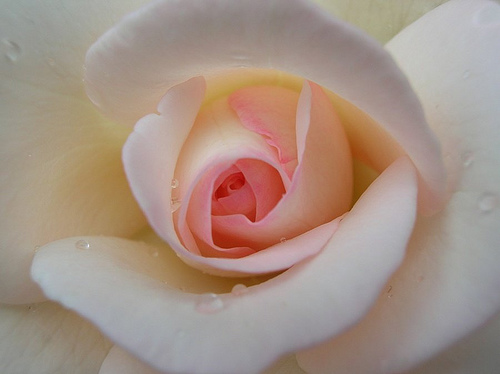

In [21]:
Image.open(str(rosses[1]))

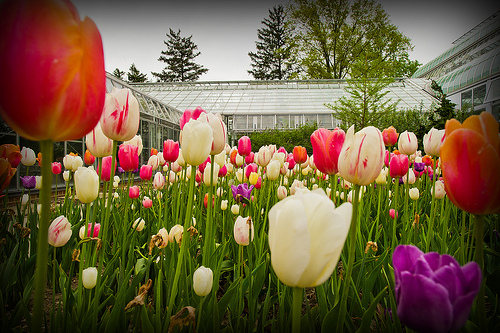

In [22]:
tulips= list(data_dir.glob('tulips/*'))
Image.open(str(tulips[1]))

In [23]:
flowers_image_dic={
'daisy': list(data_dir.glob('daisy/*')),
'dandelion': list(data_dir.glob('dandelion/*')),
'roses': list(data_dir.glob('roses/*')),
'sunflowers': list(data_dir.glob('sunflowers/*')),
'tulips': list(data_dir.glob('tulips/*')),
}

In [24]:
flower_labels_dic={
    'roses':0, 'daisy':1, 'dandelion':2, 'sunflowers':3, 'tulips':4
}

In [27]:
flowers_image_dic['roses'][:5]

[PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2735666555_01d53e74fe.jpg'),
 PosixPath('datasets/flower_photos/roses/3292654244_4a220ab96f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6039330368_c30ed224c4_m.jpg')]

In [29]:
img= cv2.imread(str(flowers_image_dic['roses'][0]))

In [30]:
img.shape

(251, 320, 3)

In [31]:
cv2.resize(img, (224, 224)).shape

(224, 224, 3)

In [32]:
cv2.imread(str(flowers_image_dic['roses'][:]))